<a href="https://colab.research.google.com/github/gokuljagannadh/Airbnb_Booking_Analysis/blob/main/Airbnb_Bookings_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

##Introduction


# 1.Loading Data
In this session we mount our data on the drive and import the necessary libraries to do our analysis and we read the data file using pandas dataframe.

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [6]:
file_path = '/content/drive/MyDrive/Colab Notebooks/Almabetter/Capstone Project 1/Airbnb NYC 2019.csv'
df = pd.read_csv(file_path)

# 2.Understanding  and Cleaning the Data
Here we look at the basic informations of our data set and see if there is any irrelevant informations and null values.
## 2.1 Understanding the basic information


In [7]:
df.info()
#checking the basic info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [8]:
#checking the columns
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [9]:
#Let's see the null values in each columns
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [ ]:
#obtaining the first 4 rows
df.head(4)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194


### 2.2 Cleaning Data


While looking at the basic info, we see that there are null values in the data set and that too in the relevant columns that is in host name and reviews per month. So we fill host name with No name and revies per month with zero



In [10]:
# Since host name and reviews per month has some null values, we fill the null host_names and null reviews per month
df['host_name'].fillna('no_name', inplace=True)
df['reviews_per_month'].fillna(0, inplace = True)

###2.3 Inspecting the columns
Here we are inspecting each columns in the data set and trying to get insights from each columns

In [11]:
# Now let's explore the number of unique values in each column

column_list = df.columns      #column list
unique_values = []            #unique values empty list
for i in column_list:
  x= df[i].nunique()
  unique_values.append(x)

#Now lets create a dataframe for the unique values

df_unique_values = pd.DataFrame({'Columns_name': column_list, 'unique_values': unique_values})
df_unique_values

,Columns_name,unique_values
0,id,48895
1,name,47905
2,host_id,37457
3,host_name,11453
4,neighbourhood_group,5
5,neighbourhood,221
6,latitude,19048
7,longitude,14718
8,room_type,3
9,price,674


Let's have a look at the first two columns,host_id and host_name

In [12]:
#lets explore the host ids with highest listings
df_top_host_id = pd.DataFrame(df['host_id'].value_counts()).reset_index().rename(columns={'index':'host_id','host_id':'Value counts'})[:10]
df_top_host_id[:3] #this gives the top 3 host ids

,host_id,Value counts
0,219517861,327
1,107434423,232
2,30283594,121


In [ ]:
#lets see the host name corresponding to the top host id
df[df['host_id']==219517861]['host_name'][:1]

38293    Sonder (NYC)
Name: host_name, dtype: object

In [ ]:
#let's also see the value counts of top 3 host name
pd.DataFrame(df['host_name'].value_counts()).reset_index().rename(columns={'index':'host_name','host_name':'Value counts'})[:3]

,host_name,Value counts
0,Michael,417
1,David,403
2,Sonder (NYC),327


In [ ]:
# Now gouping the host name and neighbourhood group to obtain the maximum reviews per month
pd.DataFrame(df.groupby(['host_name','neighbourhood_group'])['reviews_per_month'].max().sort_values(ascending=False)).reset_index().rename(columns={'index':'Host Name','host_name':'Host_name'})[:3]


,Host_name,neighbourhood_group,reviews_per_month
0,Row NYC,Manhattan,58.50
1,Louann,Queens,20.94
2,Nalicia,Queens,19.75


In [ ]:
df.loc[df['host_name']=='Row NYC']['id'].count()

9

##2.3 Insights from the Columns

```
# This is formatted as code
```



From the above results, it is clear that only the id values are unique and all other variables such as host name, host id and name are catagorical variables. Also it is observed that a particular host has multiple host ids for different properties.Also the name for each property owned by the same host is different. There were also some properties which had same host name and property name,Hillside hotel in Queens is an example. The host id with host name Sonder(NYC) has the highest listings.



#3. EDA and Data Visualisation

Now we try to exlplore some of the categorical and Numerical columns using EDA and we visualise the results

##3.1 Host ID

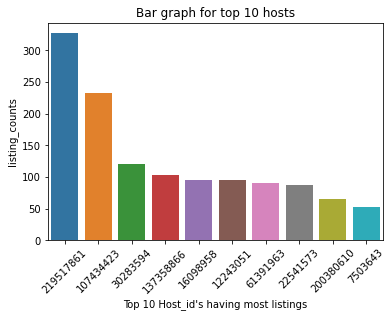

In [ ]:
# Plotting top 10 host ids with respect to their number of listings
#plt.figure(figsize = (10,8))
sns.barplot(data= df_top_host_id, x='host_id', y= 'Value counts',order = df_top_host_id.sort_values('Value counts', ascending = False).host_id )
plt.title('Bar graph for top 10 hosts')
plt.xlabel("Top 10 Host_id's having most listings")
plt.ylabel('listing_counts')
plt.xticks(rotation = 45)
plt.show()

##3.2 Top 10 Neighbourhoods

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

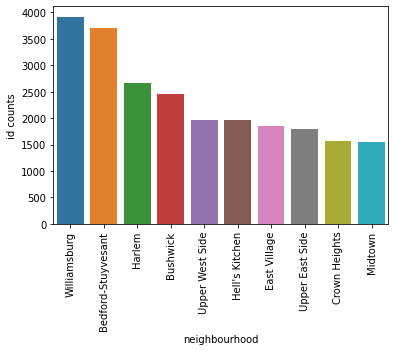

In [ ]:
#now let us see the total number of ids in each neighbourhood.
df1 = df.groupby('neighbourhood')['id'].count().sort_values(ascending=False)[:10]
df_neighbourhood = df1.reset_index().rename(columns={'index':'neighbourhood','id':'id counts'})
sns.barplot(x='neighbourhood',y='id counts',data = df_neighbourhood)
plt.xticks(rotation=90)


In [ ]:
df[df['neighbourhood']=='Williamsburg']['neighbourhood_group'][:1]

15    Brooklyn
Name: neighbourhood_group, dtype: object

##3.3 Neighbourhood Groups

In [ ]:
df['neighbourhood_group'].unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

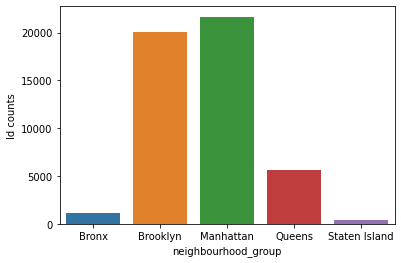

In [ ]:
df_group = pd.DataFrame(df.groupby('neighbourhood_group')['id'].count()).reset_index().rename(columns={'index':'Neighbourhood_group','id':'Id counts'})[:5]
sns.barplot(x='neighbourhood_group',y='Id counts',data = df_group)

The above plot shows the number of id counts in each neighbourhood group. manhattan and Brooklyn have the highest nummber of ids

We plotted property listings in top 10 neighbourhoods



this plot shows the id counts in each neighbourhood, which are arranged in a descending order groupwise

now counting the host name in each neighbourhood group and arranged in descending order

##3.4 Host Name

In [ ]:
#Now let's see the the top host names in each neighbourhood groups
df.groupby('neighbourhood_group')['host_name'].value_counts().sort_values(ascending=False)

neighbourhood_group  host_name   
Manhattan            Sonder (NYC)    327
                     Blueground      230
                     Michael         212
                     David           202
Brooklyn             Michael         159
                                    ... 
                     Callie            1
                     Calisa            1
                     Calia             1
                     Cal               1
Staten Island        Yuriy             1
Name: host_name, Length: 15347, dtype: int64

Here Sonder NYC was found as the host name , who had the highest number of listings in a particular neighbourhood

##3.5 Distribution of Room types 

Text(0.5, 1.0, 'Distribution of type of rooms across NYC')

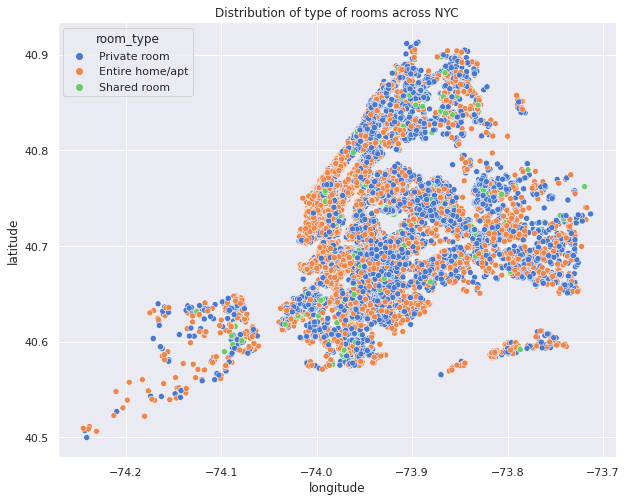

In [13]:
#Distribution of room types in NYC
sns.set(rc={"figure.figsize": (10, 8)})
ax= sns.scatterplot(x=df.longitude, y=df.latitude,hue=df.room_type,palette='muted')
ax.set_title('Distribution of type of rooms across NYC')

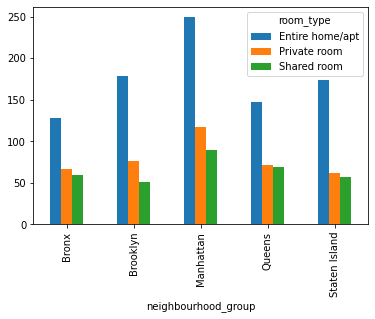

In [ ]:
# Distribution of room types in each neighbourhood groups
df.groupby(['neighbourhood_group','room_type'])['price'].mean().unstack().plot(kind='bar')

The distribution of price based on the type of room in each neighbourhood group is shown, which depicts that Manhattan has the highest mean in price in all the types among different neigbourhood groups. Also from the box plot, Manhattan has the highest mean price in overall types

##3.6 Price

In [ ]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


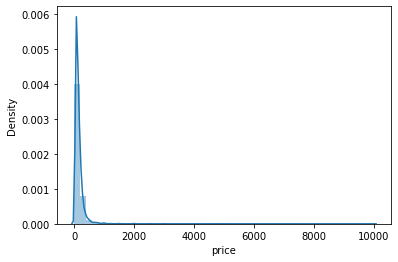

In [ ]:
sns.distplot(df['price'],hist = True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


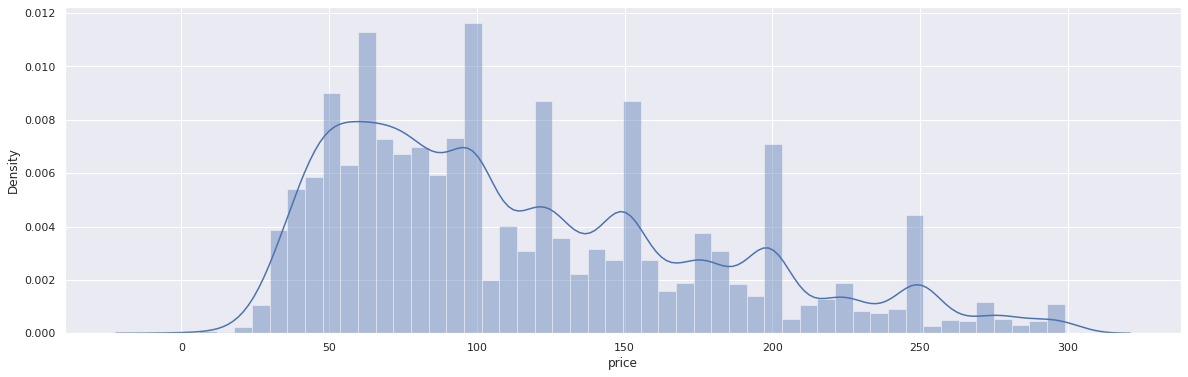

In [ ]:
sns.set(rc={"figure.figsize": (20, 6)})
df_4 =df[df['price']<300]['price']
sns.distplot(df_4,hist=True)

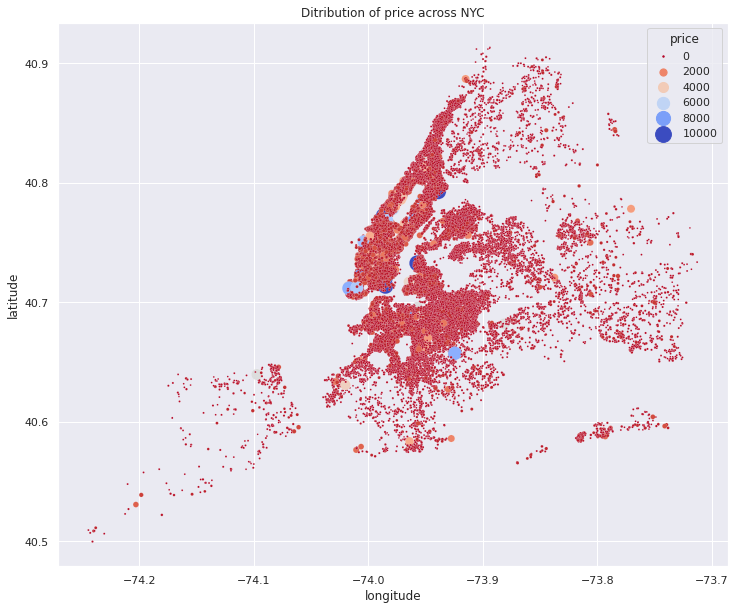

In [ ]:
# Plotting the Scatter plot to visualize the price distribution in a way that outliers are highlighted
plt.figure(figsize = (12,10))
sns.set(style="darkgrid")

sns.scatterplot(data= df, y = 'latitude', x= 'longitude', hue= 'price', palette ='coolwarm_r', sizes= (2,250),size = 'price',  )
plt.title('Ditribution of price across NYC')
plt.show()

The price distribution acrosss the entire NYC is shown. The outliers can also be spotted. Also lets try to insert the above plot in the NYC map.


In [ ]:
#the mean price for all the listings
a = df['price'].mean()
#the mean price for all the listings whose price is less than 300
b = df[df['price']<300]['price'].mean()
f'mean price for our whole data set is {a} and mean price for the listings whose price is below 300 is {b} '

'mean price for our whole data set is 152.7206871868289 and mean price for the listings whose price is below 300 is 116.01752006581141 '

In [ ]:
# The number of listings whose price value is above 300
df[df['price']>300]['id'].count()


3357

In [ ]:
# Mean price in each neighbourhood_group
df.groupby('neighbourhood_group')['price'].mean()

neighbourhood_group
Bronx             87.496792
Brooklyn         124.383207
Manhattan        196.875814
Queens            99.517649
Staten Island    114.812332
Name: price, dtype: float64

The price distribution plot for the entire data gives a postiveley skewed data around a mean value 152. there are only a few listings(aproximately 7%) whose price is above 300. 

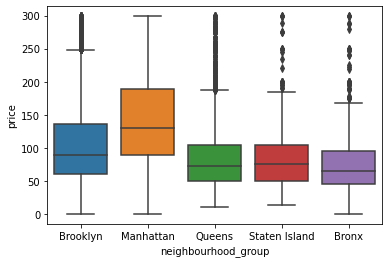

In [ ]:
sns.boxplot(x="neighbourhood_group", y="price", data=df[df['price']<300]);


Lets look at the correlation matrix

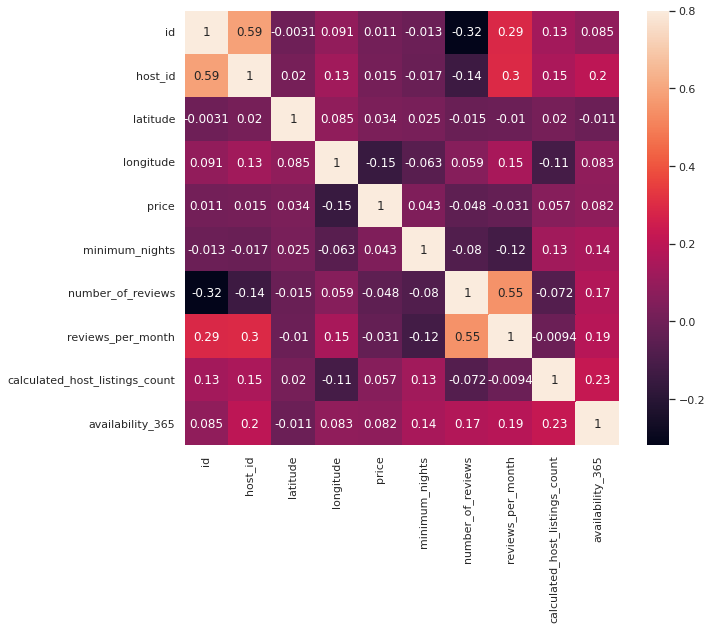

In [ ]:
#correlation matrix
corrmat = df.corr()
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corrmat, vmax=.8, annot = True, square=True);

From the correlation plot, There is positive corrrelation among

*   availability 365,calculated host listings counts 

*   availability and reviews per month
*   longitude and reviews per month

My Analysis on correlation

As calculated host listings count increases, the number of rooms available would also increase which accounts for the postive correlation among the availability 365 and calculated host listings counts.

Also if the availability is higher more people will choose that host and give reviews which accounts for the positive correlation between availability and reviews per month.

As we go to right of the map, the longitude value increases and the id counts also increases which in turn accounts for the increased number of reviews per month.


The above plot depicts the distribution of types of room in the entire NYC

In [ ]:
#lets calculate the sum of total availability for each host ids.calculated host listings count is also included in the dataframe
df_avg_availability =pd.DataFrame(df.groupby(['host_name','neighbourhood_group','calculated_host_listings_count'])['availability_365'].sum())
df5=df_avg_availability.rename(columns={'availability_365':'sum_availability'})
df_avg_availability_ = df5.reset_index()

In [ ]:
df_avg_availability_.head()

,host_name,neighbourhood_group,calculated_host_listings_count,sum_availability
0,'Cil,Queens,1,298
1,(Ari) HENRY LEE,Manhattan,1,56
2,(Email hidden by Airbnb),Brooklyn,1,0
3,(Email hidden by Airbnb),Manhattan,1,188
4,(Email hidden by Airbnb),Manhattan,2,170


In [ ]:
#lets check if there is any null values in the calculated host listings count
df_avg_availability_['calculated_host_listings_count'].isnull().sum()

0

In [ ]:
#defining a function to calculate the average availability for each host ids. Average availability is defined as the
# total availabiities for a particular host id divided by the calculated host listing counts
def avg_availability(sum,list_count):
  return sum/list_count

In [ ]:
df_avg_availability_['avg_availability'] = df_avg_availability_.apply(lambda x :avg_availability(x['sum_availability'],x['calculated_host_listings_count']),axis=1)

In [ ]:
#let's sort the calculated host listings count in descending order and avg availability in ascending order
df_avg_availability_.sort_values(['calculated_host_listings_count','avg_availability'],ascending=[False,True])

,host_name,neighbourhood_group,calculated_host_listings_count,sum_availability,avg_availability
15298,Sonder (NYC),Manhattan,327,98588,301.492355
2146,Blueground,Brooklyn,232,537,2.314655
2147,Blueground,Manhattan,232,58347,251.495690
8491,Kara,Manhattan,121,37924,313.421488
8742,Kazuya,Brooklyn,103,1384,13.436893
...,...,...,...,...,...
11345,Michael,Brooklyn,1,6780,6780.000000
3816,David,Brooklyn,1,8566,8566.000000
3819,David,Manhattan,1,9288,9288.000000
501,Alex,Manhattan,1,9789,9789.000000


Here the idea was to calculate the average availability for a particular host id Since different hosts has multiple listings. 

**Assumption**\
The one with large number of host listing counts and less number of availability would be the busiest host.

**Our** **Findings**\
 From our data we deducted the host id(219517861) who has the highest number of host listings count with less avg availability.The host name corresponding to the host id is Sonder NYC(Manhattan) only 